In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run zadanie2_network.ipynb

## Fitowanie funkcji
Sieci neuronowe służą do aproksymacji funkcji. Możemy więc spróbować nauczyć sieć wyliczać wartości dowolnej funkcji, w tym przykładzie jest to sinus.

## Function fitting
Neural networks are used to approximate functions. So we can try to teach the network to calculate the values of any function, in this example it is a sine.

In [2]:
# Generowanie danych
def genData(n, a, b):
    result = np.zeros((n, 2)) #x_i=result[i][0], y_i=result[i][1]
    points = np.arange(-10, 10, 20/n)
    points = np.sort(points)
    for i in range(0, n):
        result[i][0] = points[i]
        result[i][1] = 0.5 + 0.3 * np.sin(a * points[i] + b) + 0.01 * points[i]
    return result

data_sin = genData(100, 0.5, 3)


In [3]:
def network_sinus(network, data, learning_rate, steps):
    x = data[:,0]
    y = data[:,1]
    ### BEGIN SOLUTION
    for i in range(steps):
        k = int(np.random.uniform(len(x)))
        inp = np.zeros(1)
        inp[0] = data[k][0]
        out = network.forward(inp)
        error = np.zeros(1)
        error[0] = data[k][1] - out
        network.backward(error)
        network.learn(learning_rate)
    ### END SOLUTION

In [4]:
net_SIN = None
### BEGIN SOLUTION
net_SIN = Network(1)
net_SIN.addLayer(50)
net_SIN.addLayer(50)
net_SIN.addLayer(1)
network_sinus(net_SIN, data_sin, 0.1, 100000)
### END SOLUTION

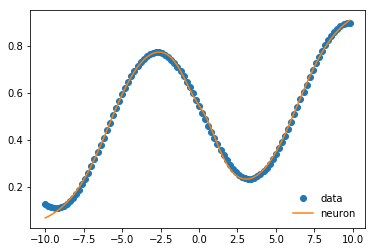

In [5]:
tmp = np.zeros((len(data_sin)))
for i in range(len(data_sin)):
    inp = np.zeros(1)
    inp[0] = data_sin[i][0]
    tmp[i] = net_SIN.forward(inp)
                         
plt.plot(data_sin[:,0], data_sin[:,1], 'o', label='data')
plt.plot(data_sin[:,0], tmp, '-', label='neuron')
plt.legend(loc='lower right', frameon=False)

In [6]:
error = 0.0
for i in range(data_sin.shape[0]):
    out = net_SIN.forward(np.array([data_sin[i][0]]))
    error += (out[0] - data_sin[i][1])**2
error /= data_sin.shape[0]
print(error)
np.testing.assert_equal(error < 0.005, True)

0.00012446981519636494
